## Import necessary libraries for data manipulation, visualization, and machine learning


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np 

# Suppress warnings for a cleaner output
import warnings

# Enable inline plotting for matplotlib

warnings.filterwarnings('ignore')

%matplotlib inline

## Load the dataset from a CSV file


In [6]:
df = pd.read_csv("./creditcard_2023.csv")


## Define feature names and target variable
The features are columns 1 to 28 (the first column is and ID and the 29th column is 'amount' which showed after the EDA that isn't correlated that much with the class)


The target variable is the last column, indicating whether a transaction is fraudulent

In [7]:
feature_names = df.iloc[:, 1:29].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]


## Splitting the Data

We will use 70% of the data for training and 30% for testing.


In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

## Import the Logistic Regression model from sklearn


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

## Fit the logistic regression model to the training data (TRAINING)


In [10]:
lr.fit(X_train, y_train)

LogisticRegression()

## Define a function to print the statistics of the confusion matrix


In [11]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

## Define a function to run the model and return the confusion matrix and predictions


In [12]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

## Import metrics from sklearn to evaluate the model


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

## Run the logistic regression model and get the confusion matrix and predictions


In [14]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

## Plot the confusion matrix using scikit-plot


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

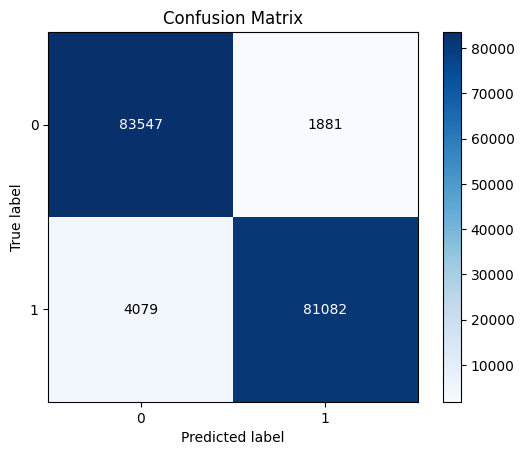

In [15]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

## Calculate and print the accuracy score


In [16]:
accuracy_score(y_test, pred)

0.9650622255831267

## Print a detailed classification report


In [17]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85428
           1       0.98      0.95      0.96     85161

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



# Logistic Regression

## Overview
Logistic regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes. It is a type of regression analysis used to estimate the probability that a given input point belongs to a certain class.

---



# How It Works
### Logistic Function
Logistic regression uses the logistic function (also known as the sigmoid function) to map predicted values to probabilities. The logistic function is defined as:

\[ $\sigma(z) = \frac{1}{1 + e^{-z}}$ \]

where \( $z$ \) is the linear combination of input features.


### Probability Output
The output of the logistic function is a probability value between 0 and 1. This probability represents the likelihood that the given input belongs to the positive class.


### Decision Boundary
To make a classification decision, a threshold (usually 0.5) is applied to the probability. If the probability is greater than or equal to the threshold, the input is classified as the positive class; otherwise, it is classified as the negative class.

---



# Logistic Regression Model
### Linear Combination
The model calculates a linear combination of the input features:

\[ $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ \]

where \( $\beta_0$ \) is the intercept and \( $\beta_1, \beta_2, \ldots, \beta_n $\) are the coefficients.

### Training
The coefficients are estimated from the training data by maximizing the likelihood of observing the given data. This is typically done using optimization algorithms like gradient descent.

### Loss Function
The loss function used is the logistic loss (or log loss), which measures the performance of the classification model. It is defined as:

\[ $\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$ \]

where \($ y_i $\) is the actual label, \( $p_i $\) is the predicted probability, and \( $N$ \) is the number of observations.

---

## Application to Fraud Detection


In the context of logistic regression, \( $z $\) is the linear combination of the input features and their corresponding coefficients, plus the intercept. It represents the raw score obtained from applying the linear model to the input features before it is passed through the sigmoid function to map it to a probability.

In terms of the dataset and the logistic regression model defined in your code, \( $z$ \) is calculated as follows:

\[ $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ \]

Where:

- \( $\beta_0$ \) is the intercept (also known as the bias term).
- \( $\beta_1, \beta_2, \ldots, \beta_n$ \) are the coefficients learned by the logistic regression model during training.
- \( $x_1, x_2, \ldots, x_n$ \) are the feature values for a given instance in the dataset.

In your dataset:

- The feature values \( $x_1, x_2, \ldots, x_n $\) correspond to the columns from the 2nd to the 29th (i.e., columns 1 to 28 in zero-based indexing of the DataFrame).
- Each \( $x_i $\) is a value from these feature columns for a particular transaction record.

The sigmoid function \( $\sigma(z)$ \) then maps this \( $z $\) value to a probability between 0 and 1:

\[ $\sigma(z) = \frac{1}{1 + e^{-z}}$ \]

This probability represents the likelihood of the transaction being classified as fraudulent (or not fraudulent, depending on how the classes are labeled in your target variable).

In summary, in our dataset, \($ z $\) corresponds to the combined effect of the features for a particular transaction, weighted by the coefficients learned during training, and adjusted by the intercept term. This \($ z $\) value is then transformed by the sigmoid function to produce a probability estimate for the binary classification of fraud detection.
